In [158]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [159]:
# Ler dados do DataSet
csv_dir = "/content/sample_data/csgo_round_snapshots.csv"
data = pd.read_csv(csv_dir, delimiter=",")

In [160]:
data.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [161]:
data.shape

(122410, 97)

In [162]:
data.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,...,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,97.886922,6.709239,6.780435,412.106568,402.714500,314.142121,298.444670,9789.023773,11241.036680,2.053901,...,1.853157,1.858100,1.540814,1.627146,1.001969,0.019819,0.048011,1.352095,0.027694,0.025750
std,54.465238,4.790362,4.823543,132.293290,139.919033,171.029736,174.576545,11215.042286,12162.806759,1.841470,...,1.772791,1.794473,1.737804,1.829147,1.458084,0.143933,0.227669,1.663246,0.169531,0.164162
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.920000,3.000000,3.000000,350.000000,322.000000,194.000000,174.000000,1300.000000,1550.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.910000,6.000000,6.000000,500.000000,500.000000,377.000000,334.000000,5500.000000,7150.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,166.917500,10.000000,10.000000,500.000000,500.000000,486.000000,468.000000,14600.000000,18000.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,175.000000,32.000000,33.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,80000.000000,5.000000,...,7.000000,7.000000,6.000000,9.000000,5.000000,3.000000,3.000000,5.000000,3.000000,2.000000


In [163]:
# Pegar informações para ver se são dados númericos ou precisa ser tratado e se tem nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [164]:
data.nunique()

time_left                    10782
ct_score                        33
t_score                         34
map                              8
bomb_planted                     2
                             ...  
ct_grenade_molotovgrenade        4
t_grenade_molotovgrenade         6
ct_grenade_decoygrenade          4
t_grenade_decoygrenade           3
round_winner                     2
Length: 97, dtype: int64

In [165]:
data['round_winner'].nunique()

2

In [166]:
data['bomb_planted'] = data['bomb_planted'].astype(np.int16)

In [167]:
encoder = LabelEncoder()

data['map'] = encoder.fit_transform(data['map'])

In [168]:
data['round_winner'] = encoder.fit_transform(data['round_winner'])

In [169]:
data['round_winner'].nunique()

2

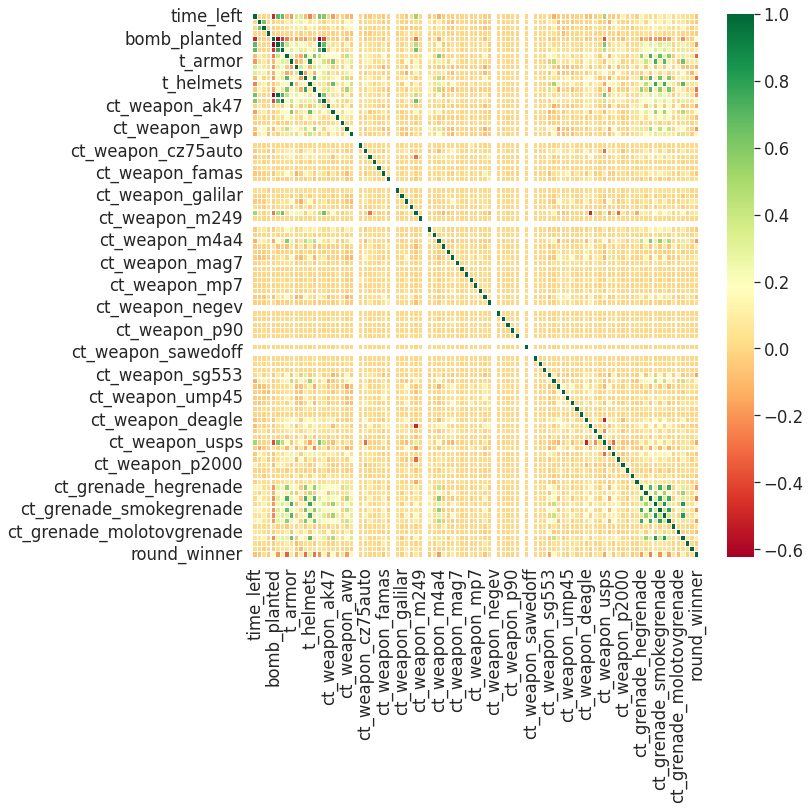

In [170]:
# Correlação
corr = pd.DataFrame(data).corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr, cmap ='RdYlGn', linewidths = 0.30)

In [171]:
y = data['round_winner']
X = data.drop('round_winner', axis=1)

In [172]:
data_columns = X.columns
data_columns

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev',

In [173]:
normalizador = MinMaxScaler()
normalizador.fit(X)
data_normalize = normalizador.transform(X)

In [174]:
data_normalize

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.89159381, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.54871707, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.65672324, 0.34375   , 0.45454545, ..., 1.        , 0.        ,
        0.        ],
       [0.542431  , 0.34375   , 0.45454545, ..., 0.8       , 0.        ,
        0.        ],
       [0.42813875, 0.34375   , 0.45454545, ..., 0.6       , 0.        ,
        0.        ]])

In [175]:
X.describe()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,...,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,97.886922,6.709239,6.780435,3.520170,0.111788,412.106568,402.714500,314.142121,298.444670,9789.023773,...,1.853157,1.858100,1.540814,1.627146,1.001969,0.019819,0.048011,1.352095,0.027694,0.025750
std,54.465238,4.790362,4.823543,1.929088,0.315107,132.293290,139.919033,171.029736,174.576545,11215.042286,...,1.772791,1.794473,1.737804,1.829147,1.458084,0.143933,0.227669,1.663246,0.169531,0.164162
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.920000,3.000000,3.000000,2.000000,0.000000,350.000000,322.000000,194.000000,174.000000,1300.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.910000,6.000000,6.000000,3.000000,0.000000,500.000000,500.000000,377.000000,334.000000,5500.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,166.917500,10.000000,10.000000,5.000000,0.000000,500.000000,500.000000,486.000000,468.000000,14600.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,175.000000,32.000000,33.000000,7.000000,1.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,...,7.000000,7.000000,6.000000,9.000000,5.000000,3.000000,3.000000,5.000000,3.000000,2.000000


In [176]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 96 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  int64  
 4   bomb_planted                  122410 non-null  int16  
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [177]:
X = pd.DataFrame(data=data_normalize, columns=data_columns)

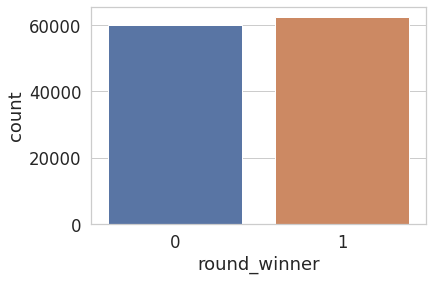

In [178]:
sns.countplot(y)

# TESTES DE MELHORES PARÂMETROS:
Descobrir os melhores valores para os parâmetros no treinamento da IA. Demora muito tempo para executar, pois faz várias interações testando a cross validation em muitos treinamentos.

In [179]:
k_score = list()

for i in range(1, 11):
  rforest = RandomForestClassifier(max_features=i, criterion='gini', random_state=0)
  scores = cross_val_score(rforest, X, y, cv=10)
  k_score.append(scores.mean())

In [180]:
%matplotlib inline
plt.plot(range(1, 11), k_score)
plt.xlabel('Value of features RFC')
plt.ylabel('Cross-Validated-Accuracy')

In [181]:
k_scores = list()
for k in range(1, 25):
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
  k_scores.append(scores.mean())

In [182]:
%matplotlib inline
plt.plot(range(1, 25), k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated-Accuracy')

# RESULTADOS E MÉTRICAS:
Todos os resultados para Random Forest e KNN Classifier, além dos gráficos para comparação das métricas.

In [183]:
scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']

knn = KNeighborsClassifier(n_neighbors=25)
scores = cross_validate(knn, X, y, scoring=scoring, cv=10)

sorted(scores.keys())

['fit_time',
 'score_time',
 'test_accuracy',
 'test_f1_macro',
 'test_precision_macro',
 'test_recall_macro']

In [184]:
test_precision = list()
test_recall = list()
test_accuracy = list()
test_f1 = list()

test_precision = scores['test_precision_macro']
test_recal = scores['test_recall_macro']
test_acurracy = scores['test_accuracy']
test_f1 = scores['test_f1_macro']

In [185]:
test_precision

array([0.73785442, 0.73783883, 0.74673311, 0.74317594, 0.75233575,
       0.74518198, 0.74485124, 0.73947723, 0.73026494, 0.72827792])

In [186]:
test_recal

array([0.73793139, 0.73735599, 0.74672177, 0.74325211, 0.75188433,
       0.74517227, 0.7449155 , 0.73932064, 0.72953724, 0.72833351])

In [187]:
test_acurracy

array([0.73776652, 0.73678621, 0.74642595, 0.74323993, 0.75132751,
       0.74487378, 0.7447104 , 0.73891022, 0.72886202, 0.72812679])

In [188]:
test_f1

array([0.7377572 , 0.73672865, 0.74642586, 0.7431904 , 0.75128232,
       0.74487372, 0.74470579, 0.73889989, 0.72875425, 0.72812278])

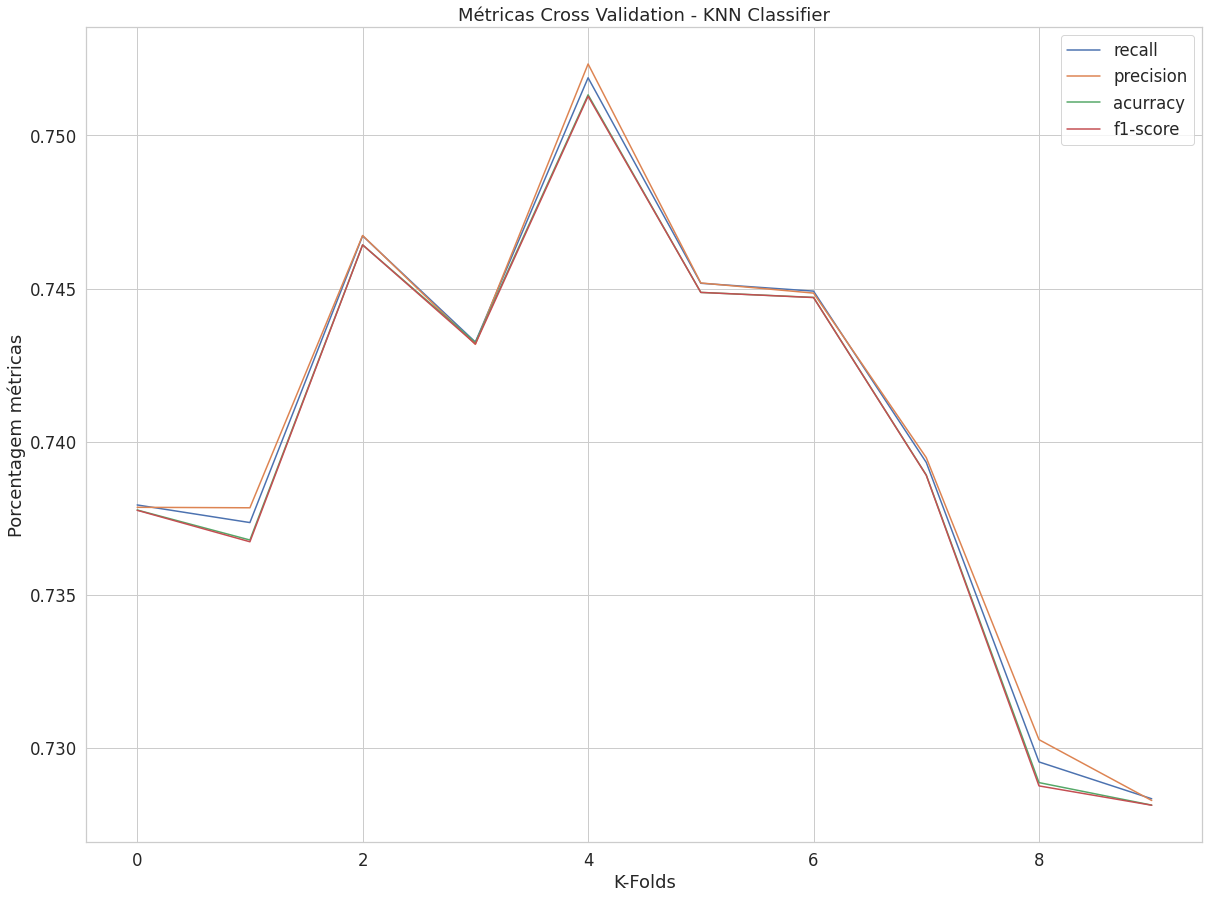

In [189]:
%matplotlib inline
plt.figure(figsize=(20, 15))
plt.plot(test_recal, label = 'recall')
plt.plot(test_precision, label = 'precision')
plt.plot(test_acurracy, label = 'acurracy')
plt.plot(test_f1, label = 'f1-score')

plt.xlabel('K-Folds')
plt.ylabel('Porcentagem métricas')
plt.title('Métricas Cross Validation - KNN Classifier')

plt.legend()

plt.show()

In [190]:
scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']

rforest = RandomForestClassifier(max_features=7, criterion='gini', random_state=0)
scores = cross_validate(rforest, X, y, scoring=scoring, cv=10)

sorted(scores.keys())

['fit_time',
 'score_time',
 'test_accuracy',
 'test_f1_macro',
 'test_precision_macro',
 'test_recall_macro']

In [191]:

test_precision = list()
test_recall = list()
test_accuracy = list()
test_f1 = list()

test_precision = scores['test_precision_macro']
test_recal = scores['test_recall_macro']
test_acurracy = scores['test_accuracy']
test_f1 = scores['test_f1_macro']

In [192]:
test_precision

array([0.75363808, 0.74544944, 0.75773578, 0.75106354, 0.76083185,
       0.75448923, 0.75431941, 0.74397469, 0.73474301, 0.74632447])

In [193]:
test_recal

array([0.75364755, 0.7450125 , 0.75765007, 0.75115823, 0.7604924 ,
       0.75458117, 0.75427425, 0.74365719, 0.73390242, 0.74607352])

In [194]:
test_acurracy

array([0.75336982, 0.74446532, 0.75729107, 0.75108243, 0.75998693,
       0.75443183, 0.75394167, 0.74315824, 0.73319173, 0.74560902])

In [195]:
test_f1

array([0.75336976, 0.74441888, 0.75728794, 0.75105348, 0.75995944,
       0.75441885, 0.75394065, 0.74312882, 0.73306663, 0.74558885])

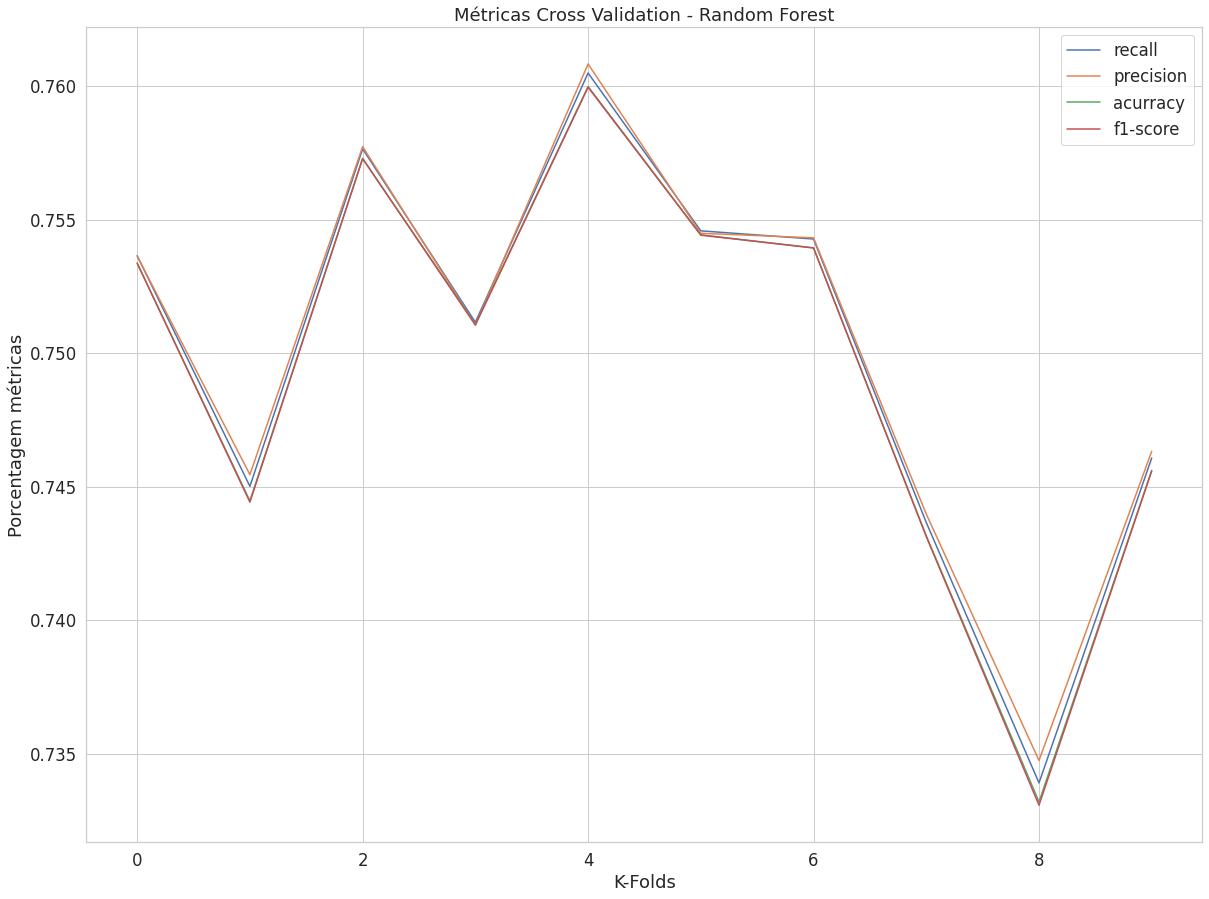

In [196]:
%matplotlib inline
plt.figure(figsize=(20, 15))
plt.plot(test_recal, label = 'recall')
plt.plot(test_precision, label = 'precision')
plt.plot(test_acurracy, label = 'acurracy')
plt.plot(test_f1, label = 'f1-score')

plt.xlabel('K-Folds')
plt.ylabel('Porcentagem métricas')
plt.title('Métricas Cross Validation - Random Forest')

plt.legend()

plt.show()

# TESTE PARA VERIFICAR AS MÉTRICAS DA CROSS VALIDATION:
Foi feita o train split para apenas ver se as métricas estavam andando muito em conjunto, como mostrado no gráfico.

In [197]:
# Teste para ver se as métricas estão corretas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [198]:
rforest = RandomForestClassifier(max_features=7, criterion='gini', random_state=0)
rforest.fit(X_train, y_train)

RandomForestClassifier(max_features=7, random_state=0)

In [199]:
# Mostrar métricas
print("Accuracy score = ", accuracy_score(y_test, rforest.predict(X_test)))
print(classification_report(y_test, rforest.predict(X_test)))

Accuracy score =  0.869264493641587
              precision    recall  f1-score   support

           0       0.86      0.88      0.87     17978
           1       0.88      0.86      0.87     18745

    accuracy                           0.87     36723
   macro avg       0.87      0.87      0.87     36723
weighted avg       0.87      0.87      0.87     36723



In [200]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [201]:
# Mostrar métricas
print("Accuracy score = ", accuracy_score(y_test, knn.predict(X_test)))
print(classification_report(y_test, knn.predict(X_test)))

Accuracy score =  0.7762437709337472
              precision    recall  f1-score   support

           0       0.76      0.79      0.78     17978
           1       0.79      0.76      0.78     18745

    accuracy                           0.78     36723
   macro avg       0.78      0.78      0.78     36723
weighted avg       0.78      0.78      0.78     36723

